In [19]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from rflearn.env import WindGridWorld, CliffGridWorld, GridWorld
from rflearn.algo import MCIteration, TabularQValue, TabularPolicy
from rflearn.algo.td import TDIteration

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Gridwolrd

In [51]:
env = GridWorld(10, 10)
qvalues = TabularQValue(env.S, env.A)
policy = TabularPolicy(env.S, env.A, epsilon=0.1)
sarsa = TDIteration(env, qvalues, policy)
sarsa.fit(gamma=1, alpha=0.1, kind='expected')

In [31]:
sarsa.transform(10000)

100%|██████████| 10000/10000 [00:01<00:00, 9335.89it/s]


In [52]:
np.random.seed(2304928)
for step in sarsa.get_steps(200000):
    state = sarsa.evaluate_policy(step)

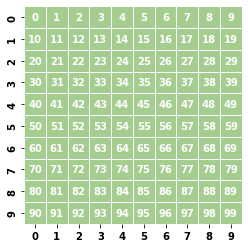

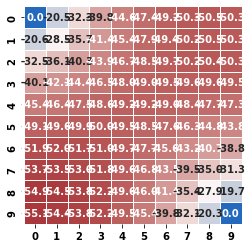

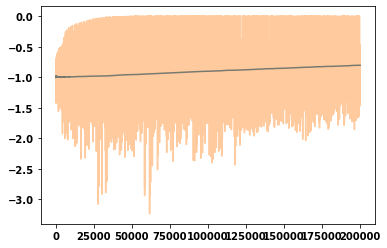

In [53]:
env.plot_grid('state')
plt.show()

v_vals = qvalues.get_all_values(policy)
sns.heatmap(v_vals.reshape(env.shape), square=True, cbar=False, cmap='vlag_r', linewidths=0.5, annot=True, fmt='.1f')
plt.show()

trace = pd.Series(map(lambda x: x['td-error'], sarsa.hist))
trace.ewm(halflife=200000/20).mean().plot()
trace.plot(alpha=0.4)
plt.show()

# Cliff World

In [2]:
env = CliffGridWorld(4, 12)
qvalues = TabularQValue(env.S, env.A)
policy = TabularPolicy(env.S, env.A, epsilon=0.1)
sarsa = TDIteration(env, qvalues, policy)
sarsa.fit(gamma=1, alpha=0.8, kind='maxq')

In [8]:
sarsa.transform(50000)

100%|██████████| 50000/50000 [00:04<00:00, 12079.30it/s]


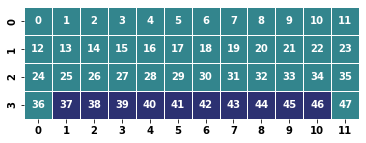

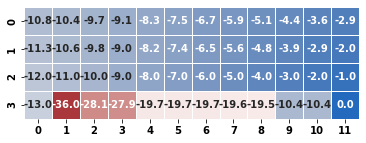

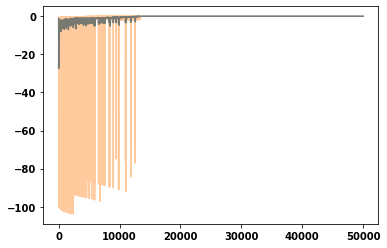

In [47]:
env.plot_grid('state')
plt.show()

v_vals = qvalues.get_all_values(policy)
sns.heatmap(v_vals.reshape(env.shape), square=True, cbar=False, cmap='vlag_r', linewidths=0.5, annot=True, fmt='.1f')
plt.show()

trace = pd.Series(sarsa.hist)
trace.ewm(halflife=25).mean().plot()
trace.plot(alpha=0.4)
plt.show()

# Windy Grid World

In [55]:
env = WindGridWorld()
qvalues = TabularQValue(env.S, env.A)
policy = TabularPolicy(env.S, env.A, epsilon=0.1)
sarsa = QLearning(env, qvalues, policy)
sarsa.fit(gamma=1, alpha=0.1)

In [56]:
sarsa.transform(50000)

100%|██████████| 50000/50000 [00:03<00:00, 12529.66it/s]


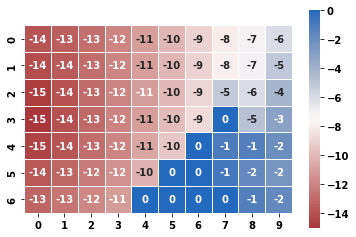

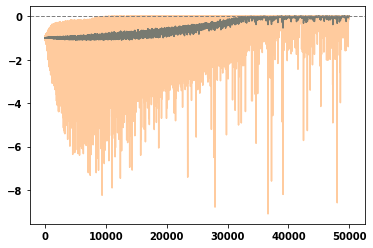

In [57]:
v_vals = qvalues.get_all_values(policy).reshape(env.shape)
sns.heatmap(v_vals, linewidths=0.5, cmap='vlag_r', square=True, annot=True, fmt='.0f')
plt.show()

loss = pd.Series(sarsa.hist)
loss.ewm(halflife=25).mean().plot()
loss.plot(alpha=0.4)
plt.axhline(0, linestyle='--', color='grey',linewidth=1)
plt.show()